# Monte Carlo Simulation

In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import copy


current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.insert(0, project_root)

from src.predict import ChurnPredictor
from src.simulation_utils import run_simulation

# Set plot style
sns.set_theme(style="whitegrid")

predictor = ChurnPredictor('../config.yaml')

In [2]:
# Load main configuration to find the model
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Instantiate the predictor with the best model
model_path = f"../models/xgboost_model.pkl"
model_loaded = predictor.load_model(model_path)

# Simulation parameters
NUM_SIMULATIONS = 20000
PRICE_INCREASE_FACTOR_15 = 1.15 # Simulate a 15% price increase
PRICE_INCREASE_FACTOR_30 = 1.30 # Simulate a 30% price increase

INFO:src.predict:Model loaded successfully from ../models/xgboost_model.pkl


In [3]:
# Based on EDA from churn_notebook.ipynb or real-world assumptions
baseline_distributions = {
    'gender': ('choice', {'options': ['Male', 'Female'], 'probabilities': [0.5, 0.5]}),
    'SeniorCitizen': ('choice', {'options': [0, 1], 'probabilities': [0.84, 0.16]}),
    'Partner': ('choice', {'options': ['Yes', 'No'], 'probabilities': [0.48, 0.52]}),
    'Dependents': ('choice', {'options': ['Yes', 'No'], 'probabilities': [0.3, 0.7]}),
    'tenure': ('uniform', [1, 72]),
    'PhoneService': ('choice', {'options': ['Yes', 'No'], 'probabilities': [0.9, 0.1]}),
    'MultipleLines': ('choice', {'options': ['Yes', 'No', 'No phone service'], 'probabilities': [0.42, 0.48, 0.1]}),
    'InternetService': ('choice', {'options': ['DSL', 'Fiber optic', 'No'], 'probabilities': [0.34, 0.44, 0.22]}),
    'OnlineSecurity': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.28, 0.5, 0.22]}),
    'OnlineBackup': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.34, 0.44, 0.22]}),
    'DeviceProtection': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.34, 0.44, 0.22]}),
    'TechSupport': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.29, 0.49, 0.22]}),
    'StreamingTV': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.38, 0.4, 0.22]}),
    'StreamingMovies': ('choice', {'options': ['Yes', 'No', 'No internet service'], 'probabilities': [0.38, 0.4, 0.22]}),
    'Contract': ('choice', {'options': ['Month-to-month', 'One year', 'Two year'], 'probabilities': [0.55, 0.24, 0.21]}),
    'PaperlessBilling': ('choice', {'options': ['Yes', 'No'], 'probabilities': [0.59, 0.41]}),
    'PaymentMethod': ('choice', {'options': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], 'probabilities': [0.34, 0.23, 0.22, 0.21]}),
    'MonthlyCharges': ('normal', [64.76, 30.09]), # mean, std from original data
    'TotalCharges': ('normal', [2283.3, 2266.8]) # mean, std from original data
}

## Baseline Simulation

In [4]:
print("--- Running Baseline Simulation ---")
baseline_results = run_simulation(predictor, baseline_distributions, NUM_SIMULATIONS, n_jobs=1)
baseline_avg_churn = baseline_results['churn_probability'].mean()

print(f"\nBaseline Average Predicted Churn Rate: {baseline_avg_churn:.4f}")

--- Running Baseline Simulation ---
Generating 20000 simulated customers...
Running simulation in single-threaded mode...
Assembling final results...
Simulation complete.

Baseline Average Predicted Churn Rate: 0.2402


## Price Increase Scenario

In [5]:

# Create a deep copy to avoid modifying the original dictionary
scenario_distributions = copy.deepcopy(baseline_distributions)

# Modify the MonthlyCharges distribution for the 15% price increase
original_mean, original_std = scenario_distributions['MonthlyCharges'][1]
scenario_distributions['MonthlyCharges'] = ('normal', [original_mean * PRICE_INCREASE_FACTOR_15, original_std * PRICE_INCREASE_FACTOR_15])

print(f"--- Running {((PRICE_INCREASE_FACTOR_15-1)*100):.0f}% Price Increase Scenario ---")
scenario_results_15 = run_simulation(predictor, scenario_distributions, NUM_SIMULATIONS, n_jobs=-1)
scenario_avg_churn_15 = scenario_results_15['churn_probability'].mean()

print(f"\nScenario Average Predicted Churn Rate: {scenario_avg_churn_15:.4f}")

--- Running 15% Price Increase Scenario ---
Generating 20000 simulated customers...
Running simulation with multiprocessing.Pool using 12 workers...


/Users/tom/workspace/github.com/itxtx/customer_churn_prediction/new_churn_env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Assembling final results...
Simulation complete.

Scenario Average Predicted Churn Rate: 0.2696


In [6]:
# Create a deep copy to avoid modifying the original dictionary
scenario_distributions = copy.deepcopy(baseline_distributions)

# Modify the MonthlyCharges distribution for the 15% price increase
original_mean, original_std = scenario_distributions['MonthlyCharges'][1]
scenario_distributions['MonthlyCharges'] = ('normal', [original_mean * PRICE_INCREASE_FACTOR_30, original_std * PRICE_INCREASE_FACTOR_30])

print(f"--- Running {((PRICE_INCREASE_FACTOR_30-1)*100):.0f}% Price Increase Scenario ---")
scenario_results_30 = run_simulation(predictor, scenario_distributions, NUM_SIMULATIONS, n_jobs=-1)
scenario_avg_churn_30 = scenario_results_30['churn_probability'].mean()

print(f"\nScenario Average Predicted Churn Rate: {scenario_avg_churn_30:.4f}")

--- Running 30% Price Increase Scenario ---
Generating 20000 simulated customers...
Running simulation with multiprocessing.Pool using 12 workers...


/Users/tom/workspace/github.com/itxtx/customer_churn_prediction/new_churn_env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Assembling final results...
Simulation complete.

Scenario Average Predicted Churn Rate: 0.2990


## Comparision

--- Comparison ---
Baseline Average Churn: 0.2402
Scenario Average Churn 15%: 0.2696
Predicted Increase in Churn Rate 15%: 0.0294
Relative Increase 15%: 12.26%
Scenario Average Churn 30%: 0.2990
Predicted Increase in Churn Rate 30%: 0.0589
Relative Increase 30%: 24.51%


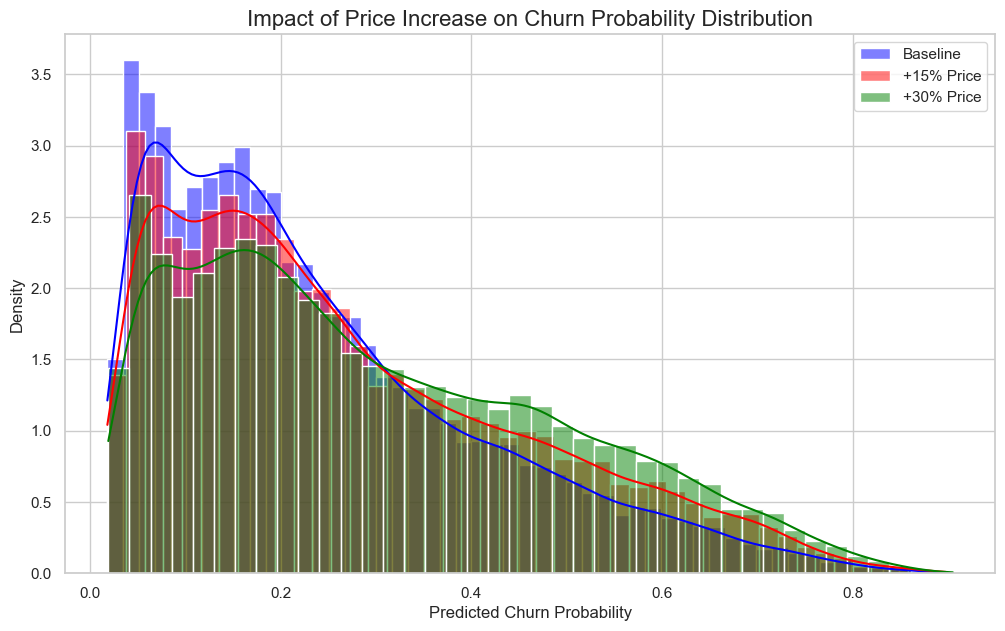

In [7]:
print("--- Comparison ---")
print(f"Baseline Average Churn: {baseline_avg_churn:.4f}")
print(f"Scenario Average Churn 15%: {scenario_avg_churn_15:.4f}")
print(f"Predicted Increase in Churn Rate 15%: {(scenario_avg_churn_15 - baseline_avg_churn):.4f}")
print(f"Relative Increase 15%: {((scenario_avg_churn_15 - baseline_avg_churn) / baseline_avg_churn) * 100:.2f}%")

print(f"Scenario Average Churn 30%: {scenario_avg_churn_30:.4f}")
print(f"Predicted Increase in Churn Rate 30%: {(scenario_avg_churn_30 - baseline_avg_churn):.4f}")
print(f"Relative Increase 30%: {((scenario_avg_churn_30 - baseline_avg_churn) / baseline_avg_churn) * 100:.2f}%")

# Plotting the distributions
plt.figure(figsize=(12, 7))
sns.histplot(baseline_results['churn_probability'], color='blue', label='Baseline', kde=True, stat='density', common_norm=False)
sns.histplot(scenario_results_15['churn_probability'], color='red', label=f'+{((PRICE_INCREASE_FACTOR_15-1)*100):.0f}% Price', kde=True, stat='density', common_norm=False)
sns.histplot(scenario_results_30['churn_probability'], color='green', label=f'+{((PRICE_INCREASE_FACTOR_30-1)*100):.0f}% Price', kde=True, stat='density', common_norm=False)
plt.title('Impact of Price Increase on Churn Probability Distribution', fontsize=16)
plt.xlabel('Predicted Churn Probability')
plt.legend()
plt.show()